In [9]:
import os
import glob
from pathlib import Path
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

In [10]:
np.random.seed(42)

# Отбор 3000 случайных экземпляров

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
images = sorted(glob.glob('/content/drive/MyDrive/course_work/data/images/*'))
masks = sorted(glob.glob('/content/drive/MyDrive/course_work/data/masks/*'))

In [13]:
print(len(images), len(masks))

4871 4871


In [14]:
index = np.random.choice(len(images), 3000, replace=False)
images_eda = np.array(images)[index]
masks_eda  = np.array(masks)[index]

# Создание DataFrame и просмотр статистики по изображениям и маскам


In [15]:
data = []

In [16]:
for img_path, mask_path in zip(images_eda, masks_eda):
    w, h = Image.open(img_path).size
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask_area = np.sum(mask > 0)
    mask_fraction = mask_area / (w * h)

    data.append({
        'filename': Path(img_path).name,
        'width': w,
        'height': h,
        'mask_area': mask_area,
        'mask_fraction': mask_fraction
    })

In [17]:
df_data = pd.DataFrame(data)

In [18]:
df_data.describe()

,width,height,mask_area,mask_fraction
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,888.881000,721.017667,153549.169333,0.254527
std,209.746455,85.326394,113228.653427,0.192507
min,386.000000,277.000000,792.000000,0.001434
25%,656.500000,682.000000,61378.500000,0.099918
50%,1024.000000,682.000000,135925.500000,0.215520
75%,1024.000000,800.000000,221749.500000,0.362932
max,1024.000000,1024.000000,725888.000000,0.996662


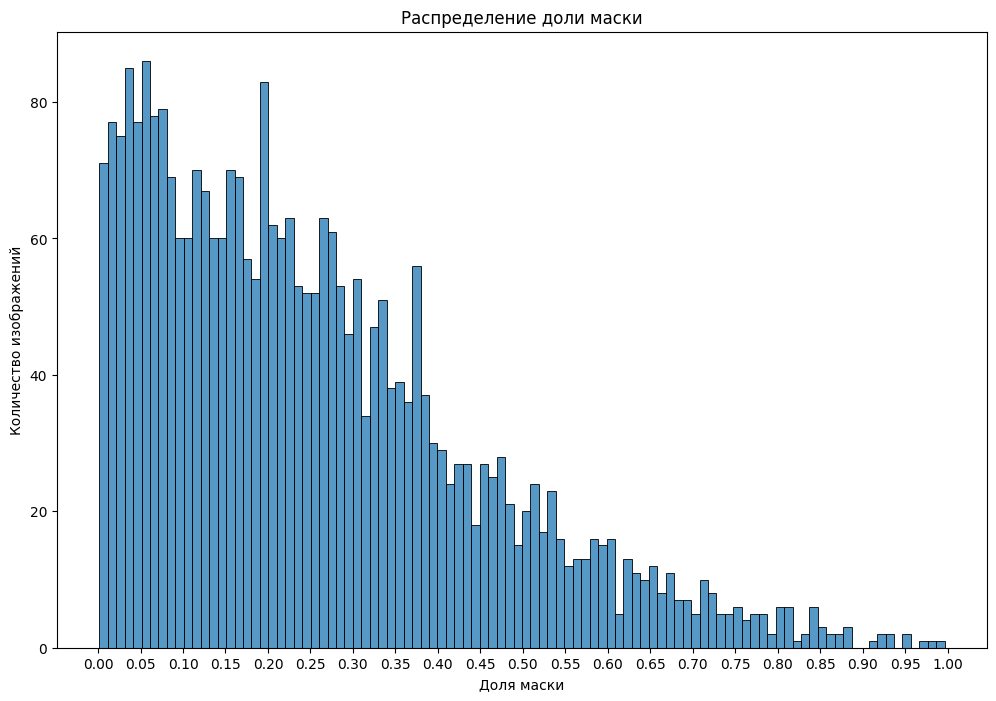

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(df_data['mask_fraction'], bins=100)
plt.title('Распределение доли маски')
plt.xlabel('Доля маски')
plt.ylabel('Количество изображений')
plt.xticks(np.arange(0, 1.05, 0.05))

plt.show()


# Анализ изображений из выборки

In [20]:
count_images = 5

plt.figure(figsize=(15, count_images * 5))

for i in range(count_images):
    img = cv2.imread(images_eda[i])[..., ::-1]
    mask = cv2.imread(masks_eda[i], cv2.IMREAD_GRAYSCALE)

    plt.subplot(count_images, 2, 2 * i + 1)
    plt.imshow(img)
    plt.title('Фото')
    plt.axis('off')

    plt.subplot(count_images, 2, 2 * i + 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Маска')
    plt.axis('off')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [21]:
all_masks = np.zeros((df_data['height'].max(), df_data['width'].max()))

for mask_path in masks_eda:
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask_resized = cv2.resize(mask, (all_masks.shape[1], all_masks.shape[0]))
    all_masks += (mask_resized > 0).astype(np.float32)

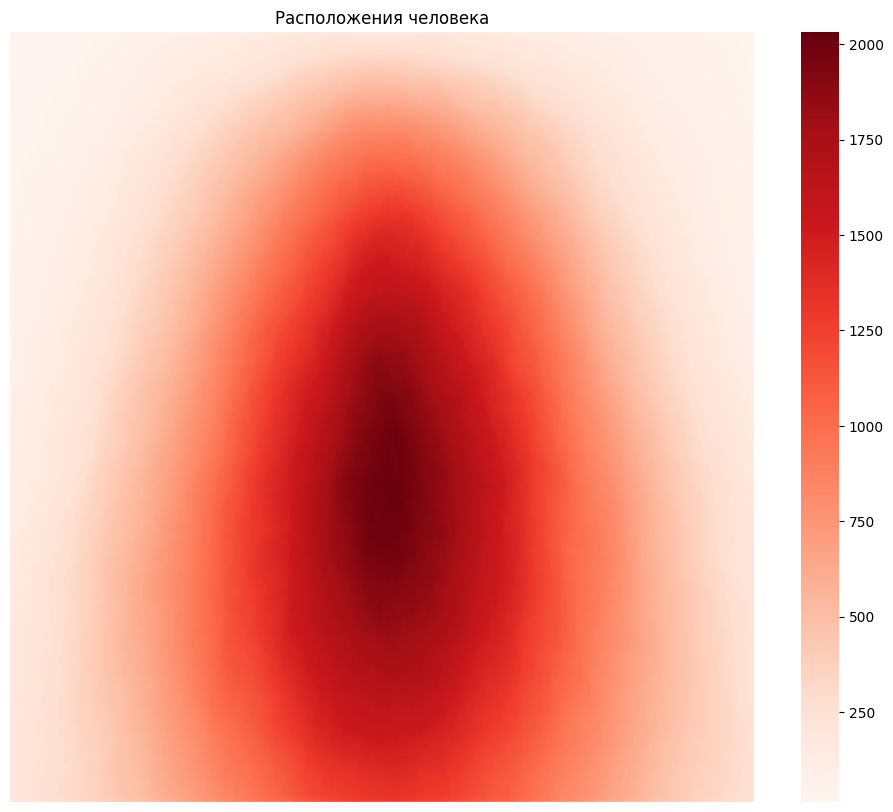

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(all_masks, cmap='Reds')
plt.title('Расположения человека')
plt.axis('off')
plt.show()


In [23]:
anom_images = np.where((df_data['mask_fraction'] < 0.01) | (df_data['mask_fraction'] > 0.95))[0]
anom_images = anom_images[np.argsort(df_data['mask_fraction'].iloc[anom_images].values)]

In [24]:
len(anom_images)

68

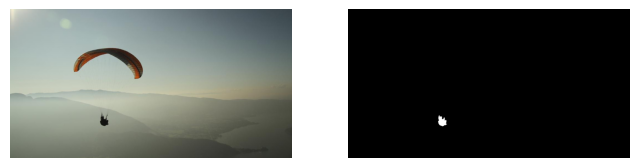

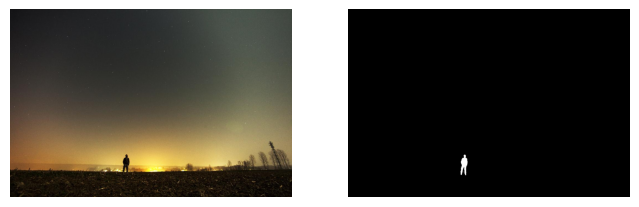

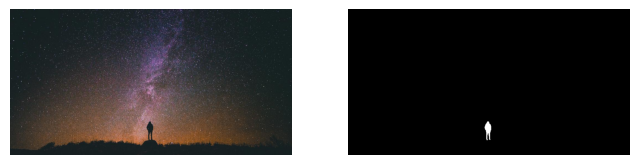

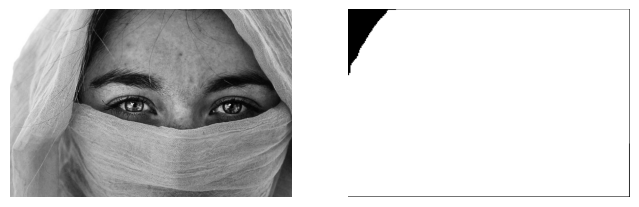

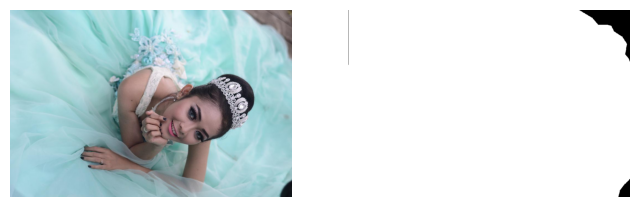

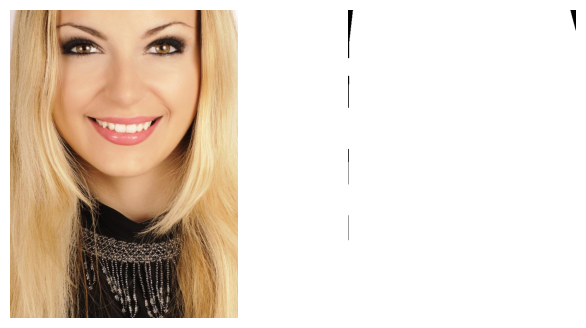

In [25]:
for index in anom_images[:3]:
    img = cv2.imread(images_eda[index])[..., ::-1]
    mask = cv2.imread(masks_eda[index], cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.show()

for idx in anom_images[-3:]:
    img = cv2.imread(images_eda[idx])[..., ::-1]
    mask = cv2.imread(masks_eda[idx], cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.show()